In [2]:
####
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [4]:
my_train_data = pd.read_csv('C:\py\Titanic/train.csv')
my_test_data = pd.read_csv('C:\py\Titanic/test.csv')

In [5]:
my_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
pd.isnull(my_train_data).sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

<AxesSubplot:>

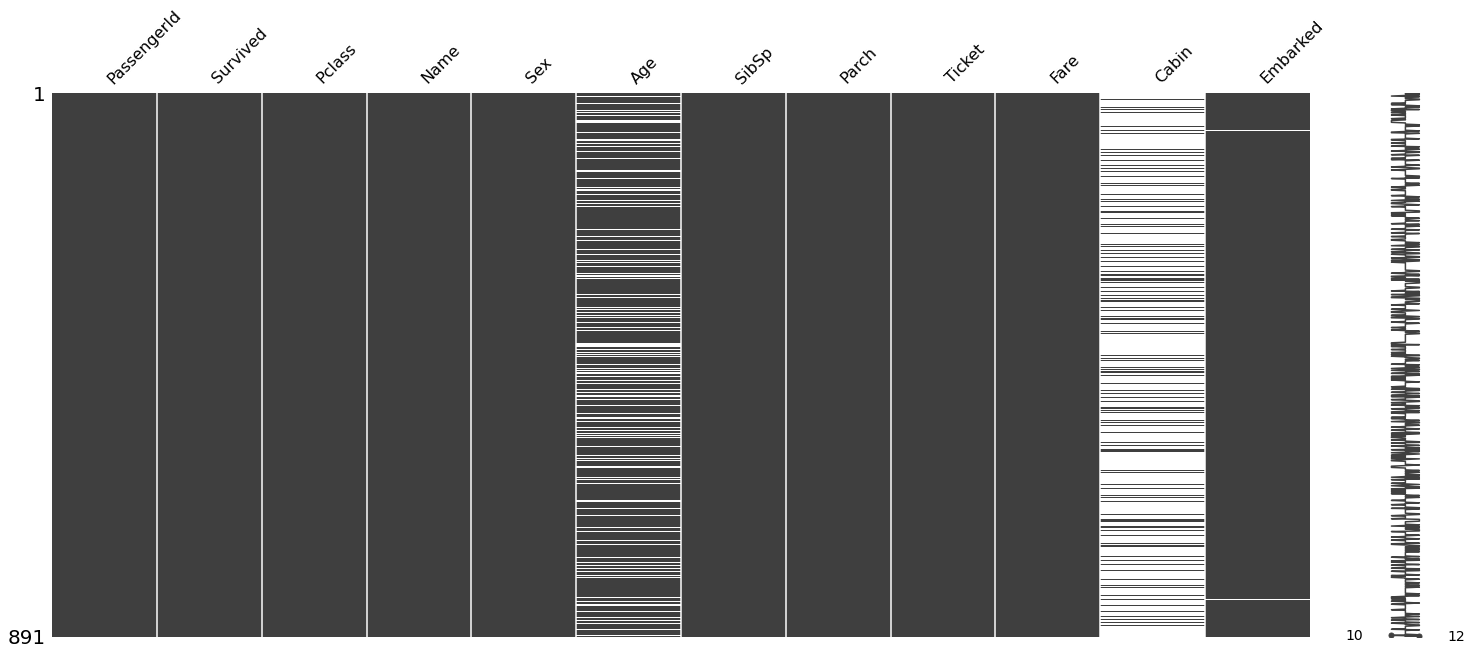

In [7]:
missingno.matrix(my_train_data)

In [8]:
pd.isnull(my_test_data).sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [9]:
####  How many female survived the titaniv from the train data
print(my_train_data[['Sex' ,'Survived']].groupby(['Sex'], as_index= False).sum().sort_values('Survived'))
my_train_data.head()



      Sex  Survived
1    male       109
0  female       233


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

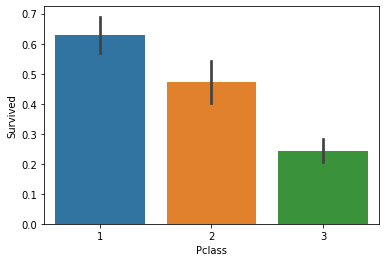

In [10]:
#did any one from the third class survivef
print(my_train_data[my_train_data['Survived'] == 1].groupby(['Pclass']).count()['Survived'])
sns.barplot(x = 'Pclass', y= 'Survived', data = my_train_data)

In [11]:
#### How many embarked
my_train_data['Embarked'].value_counts(dropna=False)
###
my_train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by= 'Survived', ascending =False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [12]:
pd.pivot_table(my_train_data, index = 'Survived', aggfunc='count')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
Survived,,,,,,,,,,,
0,424,68,549,549,549,549,549,549,549,549,549
1,290,136,340,342,342,342,342,342,342,342,342


In [13]:
# data of those that survived grouped by Pclass
Survived = (my_train_data[my_train_data['Survived'] == 1]).groupby (my_train_data['Pclass']).sum()
print(Survived)

        PassengerId  Survived  Pclass      Age  SibSp  Parch        Fare
Pclass                                                                  
1             66881       136     136  4314.92     67     53  13002.6919
2             38200        87     174  2149.83     43     56   1918.8459
3             46893       119     357  1754.92     52     50   1629.6916


<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

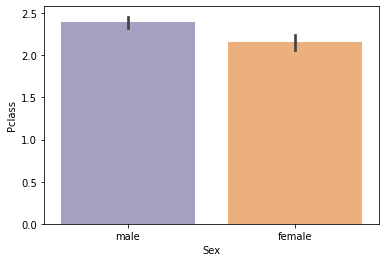

In [14]:
sns.barplot(x="Sex", y="Pclass", data=my_train_data,palette="tab20c_r")

<AxesSubplot:xlabel='Age'>

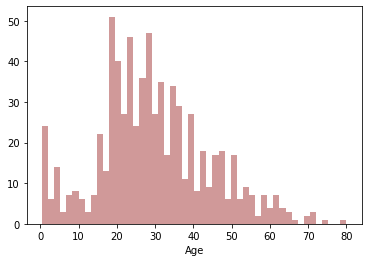

In [15]:
#age distribution 
sns.distplot(my_train_data['Age'].dropna(), bins= 50, kde = False, color = 'darkred')

In [16]:
my_train_data['Fare'].iplot(kind ='hist', bins = 20, color ='green')

In [17]:
#creating a function that fills up the age with the average age of each Pclass category
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]


    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
my_train_data['Age'] = my_train_data[['Age','Pclass']].apply(input_age, axis=1) 

<AxesSubplot:>

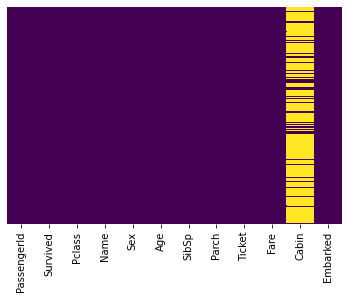

In [18]:
sns.heatmap(my_train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
### droping cabin
my_train_data = my_train_data.drop(labels= 'Cabin', axis=1 )

In [20]:
my_train_data.dropna(inplace =True)

In [21]:
sex = pd.get_dummies(my_train_data['Sex'],drop_first=True)
embark = pd.get_dummies(my_train_data['Embarked'], drop_first = True)

In [22]:
my_train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace=True)

In [23]:
my_train_data = pd.concat([my_train_data, sex, embark], axis =1 )
my_train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
### building model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix


In [25]:
x_train, x_test, y_train, y_test = train_test_split(my_train_data.drop('Survived', axis =1), my_train_data['Survived'], test_size= 0.3, random_state=101)

In [26]:
logmod = LogisticRegression()
logmod.fit(x_train, y_train)

LogisticRegression()

In [27]:
predicsion = logmod.predict(x_test) # this prediction gives the new y_pred that is used in a confusion matrix to compare the original y_test(already givine) to a y_pred(the one our model gave us)
from sklearn.metrics import accuracy_score, confusion_matrix


In [28]:
#model Evaluation
print(classification_report(y_test, predicsion))
#another method for accuracy 
score = accuracy_score(y_test, predicsion)
print(score)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267

0.797752808988764


In [29]:
confusion_matrix(y_test, predicsion, labels=[0, 1])

array([[148,  15],
       [ 39,  65]], dtype=int64)

In [30]:
my_train_data.head()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
my_test_data = my_test_data.drop(['Name', 'Cabin','Ticket'], axis = 1)

my_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [32]:
my_test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [33]:
my_test_data['Age'] = my_test_data[['Age', 'Pclass']].apply(input_age, axis = 1)
my_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [34]:
my_test_data['Fare'] = my_test_data['Fare'].fillna(my_test_data['Fare'].mean())
my_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [35]:
Sex = pd.get_dummies(my_test_data['Sex'], drop_first =True)
Embarked = pd.get_dummies(my_test_data['Embarked'], drop_first =True)
print(Embarked)
my_test_data = my_test_data.drop(['Sex', 'Embarked'], axis=1)


     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[418 rows x 2 columns]


In [36]:
my_test_data =pd.concat([my_test_data, Sex, Embarked], axis =1) 

In [37]:
my_test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [38]:
###prediction part
y_predicted = logmod.predict(my_test_data)

In [39]:
submission = pd.DataFrame(
    {
     'PassengerId': my_test_data['PassengerId'],
     'Survived': y_predicted  
    }
)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [40]:
submission.to_csv('Submission.csv', index = False)

In [42]:
###done

In [45]:
#Trying Basic Decision tree and evaluating it
from sklearn.tree import DecisionTreeRegressor
### loading the model
Tree_model = DecisionTreeRegressor(random_state = 1)
## fiting
fitting = Tree_model.fit(x_train, y_train)
### predicting
prediciting = Tree_model.predict(x_test)
# checking model accuracy
score = accuracy_score(y_test, prediciting)
print(score)
confusion_matrix(y_test, prediciting, labels=[0, 1])

0.7415730337078652


array([[128,  35],
       [ 34,  70]], dtype=int64)

In [ ]:
##### this decision tree is even lower than  I expected